In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import os

from sklearn.metrics import classification_report,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [2]:
data = pd.read_csv('C:\\Users\\14437\\Downloads\\full_data.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


0    3486
1     246
Name: stroke, dtype: int64


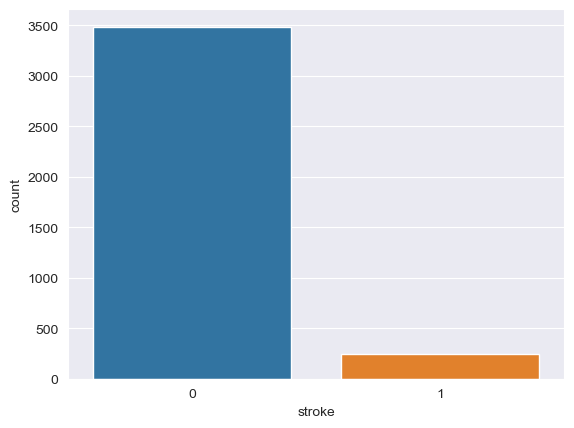

In [5]:
data_clean = data[data['age']>25]
data_clean = data_clean.replace({'gender': {'Female': 0, 'Male': 1}})
data_clean['stroke'].value_counts().to_frame().T
data_clean = data_clean.replace({'ever_married': {'Yes': 1, 'No': 0}})
data2 = pd.get_dummies(data_clean, columns=["work_type", "Residence_type","smoking_status"], prefix=["work", "residence","smoke"])
target = 'stroke'
X = data2.loc[:,data2.columns!=target]
y = data2.loc[:,data2.columns==target]
target = 'stroke'
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())

In [6]:
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X.shape, y.shape
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle=True)

1    3486
0    3486
Name: stroke, dtype: int64


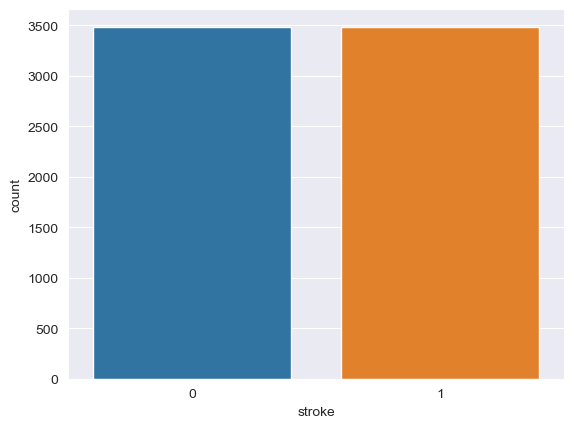

In [7]:
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())

In [8]:
from sklearn.svm import SVC
svc = SVC(kernel="poly", degree=8)
svc.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [9]:
y_pred_svc = svc.predict(X_test)

In [11]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_svc

0.7397849462365591

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KMeans
from sklearn import datasets
from sklearn.model_selection import learning_curve
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)
sizes, training_scores, testing_scores = learning_curve(svc, X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

In [13]:
train_mean = np.mean(training_scores, axis=1)
train_std = np.std(training_scores, axis=1)

test_mean = np.mean(testing_scores, axis=1)
test_std = np.std(testing_scores, axis=1)

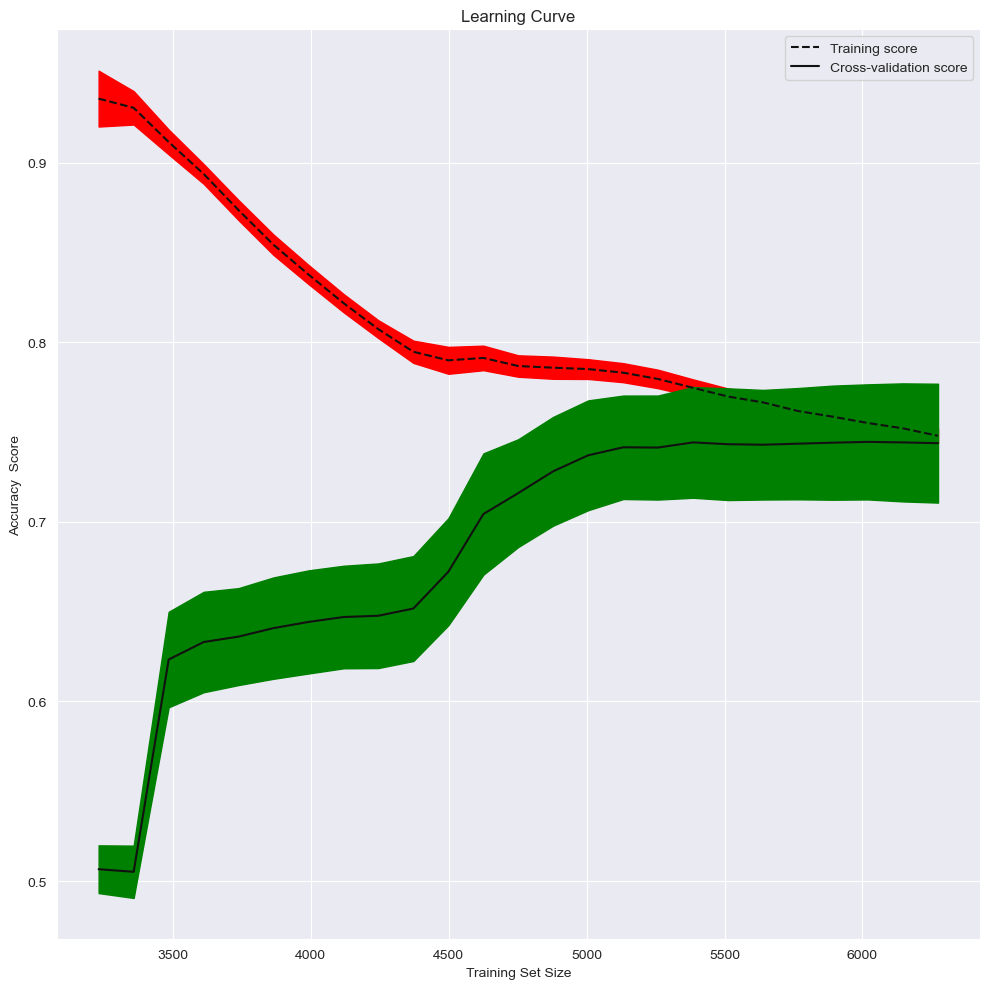

In [14]:
plt.subplots(1, figsize=(10,10))
plt.plot(sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(sizes, test_mean, color="#111111", label="Cross-validation score")
plt.fill_between(sizes, train_mean - train_std, train_mean + train_std, color="red")
plt.fill_between(sizes, test_mean - test_std, test_mean + test_std, color="green")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy  Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [16]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf', 'poly']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'C': 6, 'kernel': 'linear'}
Accuracy: 0.9297491039426523
Confusion Metrix:
 [[697  98]
 [  0 600]]
